
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 500.  Construct portfolios from the 500 stocks in the S&P 500 large cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp500-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M Company,US Stocks:Industrials,200.83,56.00,15.62,-3.66,6.24,30.75,15.51,22.65,15.62,0.69
1,ABT,Abbott Laboratories,US Stocks:Healthcare,356.66,74.88,42.69,32.75,30.10,27.34,8.30,19.62,42.69,2.18
2,ABBV,AbbVie Inc.,US Stocks:Healthcare,-34.32,50.00,14.18,3.73,19.43,29.56,20.01,30.92,14.18,0.46
3,ABMD,ABIOMED Inc,US Stocks:Healthcare,-0.30,81.43,84.57,12.24,35.52,45.56,24.64,47.80,84.57,1.77
4,ACN,Accenture plc,US Stocks:Technology,-11.07,32.68,23.01,21.51,24.67,22.81,14.00,23.39,23.01,0.98
5,ATVI,Activision Blizzard,US Stocks:Communication Services,335.06,244.81,69.04,16.77,29.84,40.43,14.58,31.03,69.04,2.22
6,ADBE,Adobe Inc.,US Stocks:Technology,58.01,19.57,33.41,38.57,46.16,24.64,13.76,23.87,33.41,1.40
7,AMD,Advanced Micro Devices Inc,US Stocks:Technology,-46.23,52.38,71.65,101.91,117.44,37.73,25.26,56.68,71.65,1.26
8,AAP,Advance Auto Parts,US Stocks:Consumer Discretionary,-48.35,14.75,23.46,14.28,3.02,34.94,24.47,35.53,23.46,0.66
9,AES,AES Corp,US Stocks:Utilities,190.10,209.90,37.45,44.90,28.44,51.66,31.69,27.57,37.45,1.36


In [6]:
# Rank
#rank = bb.rank(df, rank_by='Sharpe Ratio')
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=2)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
324,NEE,NextEra Energy,US Stocks:Utilities,85.75,55.37,27.99,36.12,28.24,30.64,21.52,15.80,27.99,1.77
33,AWK,American Water Works Company Inc,US Stocks:Utilities,91.64,7.69,23.63,31.69,22.44,20.00,9.75,15.89,23.63,1.49
163,ENPH,Enphase Energy,US Stocks:Technology,2.35,787.31,409.51,345.85,153.24,69.73,43.60,80.56,409.51,5.08
349,PYPL,PayPal,US Stocks:Technology,725.63,452.32,138.29,57.62,53.99,44.02,18.41,31.00,138.29,4.46
167,EQIX,Equinix,US Stocks:Real Estate,215.71,5.74,24.27,24.73,25.58,18.88,7.99,18.89,24.27,1.28
140,DLR,Digital Realty Trust Inc,US Stocks:Real Estate,306.05,34.35,21.43,18.31,17.91,22.75,11.20,20.17,21.43,1.06
198,FCX,Freeport-McMoRan Inc.,US Stocks:Materials,43.15,520.96,151.94,23.39,45.17,65.45,33.86,52.01,151.94,2.92
15,ALB,Albemarle Corp,US Stocks:Materials,-78.38,222.87,87.33,16.01,27.60,36.03,22.37,45.06,87.33,1.94
134,DE,Deere & Co.,US Stocks:Industrials,109.28,155.16,87.38,29.15,34.76,34.35,19.88,29.12,87.38,3.00
374,PWR,Quanta Services Inc.,US Stocks:Industrials,15.50,84.09,90.59,31.97,34.43,36.94,19.69,33.21,90.59,2.73


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'DS Vola'},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,NEE,AWK,ENPH,PYPL,EQIX,DLR,FCX,ALB,DE,PWR,...,MKTX,COG,WMB,WMT,EL,ETSY,TSLA,TTWO,ATVI,Ranked Portfolio
Annual Returns,27.99,23.63,409.51,138.29,24.27,21.43,151.94,87.33,87.38,90.59,...,62.59,23.32,15.39,26.98,36.48,346.30,419.65,77.79,69.04,108.59
Std Dev,15.80,15.89,80.56,31.00,18.89,20.17,52.01,45.06,29.12,33.21,...,34.26,33.76,36.34,15.32,27.06,64.05,79.30,31.24,31.03,32.56
Sharpe Ratio,1.77,1.49,5.08,4.46,1.28,1.06,2.92,1.94,3.00,2.73,...,1.83,0.69,0.42,1.76,1.35,5.41,5.29,2.49,2.22,3.34
Weight,0.05,0.04,0.07,0.02,0.09,0.08,0.05,0.03,0.05,0.05,...,0.03,0.03,0.02,0.05,0.06,0.03,0.04,0.04,0.04,1.00
Worst Typical Down Year,-3.61,-8.15,248.39,76.29,-13.51,-18.91,47.92,-2.79,29.14,24.17,...,-5.93,-44.20,-57.29,-3.66,-17.64,218.20,261.05,15.31,6.98,43.48
Black Swan,-19.41,-24.04,167.83,45.29,-32.40,-39.08,-4.09,-47.85,0.02,-9.04,...,-40.19,-77.96,-93.63,-18.98,-44.70,154.15,181.75,-15.93,-24.05,10.93


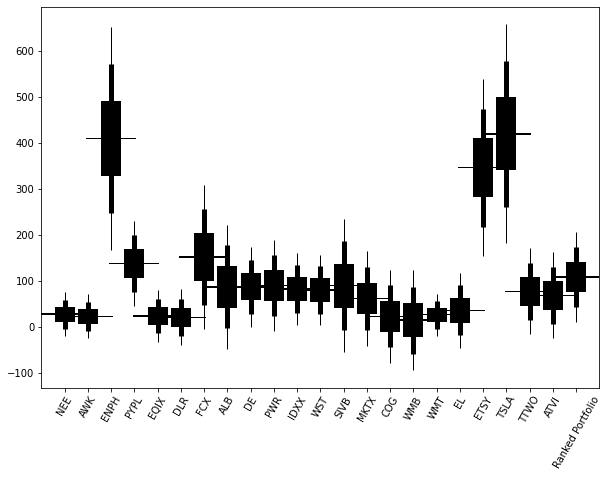

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

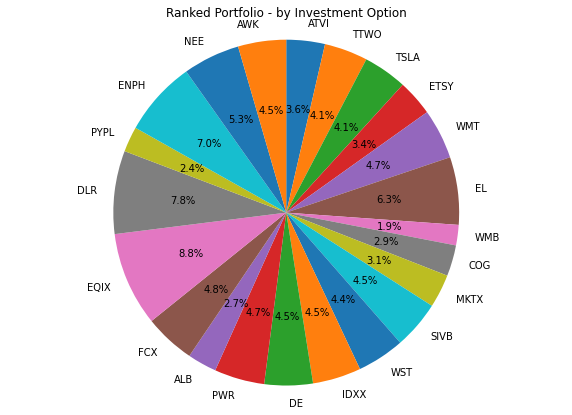

ATVI   0.04
TTWO   0.04
TSLA   0.04
ETSY   0.03
WMT    0.05
EL     0.06
WMB    0.02
COG    0.03
MKTX   0.03
SIVB   0.04
WST    0.04
IDXX   0.05
DE     0.05
PWR    0.05
ALB    0.03
FCX    0.05
EQIX   0.09
DLR    0.08
PYPL   0.02
ENPH   0.07
NEE    0.05
AWK    0.04



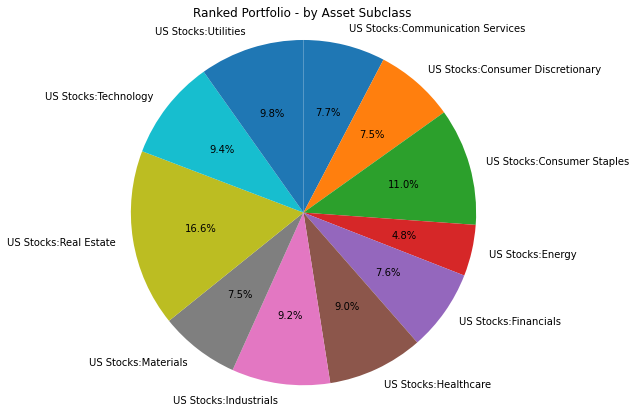

US Stocks:Communication Services   0.08
US Stocks:Consumer Discretionary   0.07
US Stocks:Consumer Staples         0.11
US Stocks:Energy                   0.05
US Stocks:Financials               0.08
US Stocks:Healthcare               0.09
US Stocks:Industrials              0.09
US Stocks:Materials                0.07
US Stocks:Real Estate              0.17
US Stocks:Technology               0.09
US Stocks:Utilities                0.10



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    NEE                            0.0532
    AWK                            0.0449
    ENPH                           0.0703
    PYPL                           0.0237
    EQIX                           0.0880
    DLR                            0.0777
    FCX                            0.0475
    ALB                            0.0273
    DE                             0.0452
    PWR                            0.0469
    IDXX                           0.0453
    WST                            0.0444
    SIVB                           0.0449
    MKTX                           0.0312
    COG                            0.0289
    WMB                            0.0191
    WMT                            0.0467
    EL                             0.0632
    ETSY                           0.0338
    TSLA                           0.0409
    TTWO                           0.0406
    ATVI                           0.0361


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...............

Ranked Portfolio Metrics:           
    max_sharpe_ratio            4.31
    annual_return             181.66
    std_dev                    42.15
    worst typical down year    97.36
    black_swan                 55.21


Ranked Portfolio Weights:
    NEE                            0.0000
    AWK                            0.0000
    ENPH                           0.1100
    PYPL                           0.1200
    EQIX                           0.0500
    DLR                            0.0000
    FCX                            0.0500
    ALB                            0.0000
    DE                             0.0300
    PWR                            0.0400
    IDXX                           0.0800
    WST                            0.0000
    SIVB                           0.0000
    MKTX                           0.1200
    COG                            0.0000
    WMB                            0.0000
    WMT                            0.0600
  

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).